In [82]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle



#Read The Dataset

In [83]:
data=pd.read_csv("/content/kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


#Rename The Columns

In [84]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
data.columns=['id','age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cell','pus_cells','pus_cells_clumps','bacteria','blood glucose random','blood_urea','serum_creatinie','sodiam','potassium','hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertention','diabetesmellites','coronary_artery_disease','appetite','pedal_edema','anemia','class']

In [5]:
data.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cell', 'pus_cells', 'pus_cells_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinie', 'sodiam',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertention',
       'diabetesmellites', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

#Handling Missing Values


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cell           248 non-null    object 
 7   pus_cells                335 non-null    object 
 8   pus_cells_clumps         396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinie          383 non-null    float64
 13  sodiam                   313 non-null    float64
 14  potassium                3

In [7]:
data.isnull().any()

id                         False
age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cell              True
pus_cells                   True
pus_cells_clumps            True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinie             True
sodiam                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertention                True
diabetesmellites            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [95]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)


KeyError: ignored

In [92]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hyper_tension'].fillna(data['hyper_tension'].mode()[0],inplace=True)
data['pus_cells_clumps'].fillna(data['pus_cells_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)




KeyError: ignored

#Handling Categorical Columns

In [11]:
cantcols=set(data.dtypes[data.dtypes=='0'].index.values)
print(cantcols)



set()


In [13]:
for i in cantcols:
    print("columns:",i)
    print(c(data[i]))
    print('*'*120+'\n')
  

In [21]:
cantcols.remove('red_blood_cells_count')
cantcols.remove('packed_cell_volume')
cantcols.remove('white_blood_cell_count')
print(cantcols)




KeyError: ignored

#Labeling Encoding For Categorical Columns

In [22]:
carcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmettit','hypertension','pus_cell','pus_cell_clumps','red_blood_cells']

In [24]:
from sklearn.preprocessing import LabelEncoder
for i in cantcols:
    print("LABEL ENCODING OF:",i)
    LEi = LabelEncoder()
    print(c(data[i]))
    data[i] = LEi.fit_trasform(data[i])
    print(c(data[i]))
    print("*"*100)

#Handling Numerical columns 

In [25]:
contcols=set(data.dtypes[data.dtypes!='0'].index.values)
print(contcols)

{'age', 'anemia', 'blood glucose random', 'specific_gravity', 'serum_creatinie', 'red_blood_cell', 'appetite', 'potassium', 'hypertention', 'bacteria', 'albumin', 'sodiam', 'packed_cell_volume', 'pus_cells_clumps', 'sugar', 'coronary_artery_disease', 'pedal_edema', 'id', 'red_blood_cell_count', 'blood_pressure', 'diabetesmellites', 'hemoglobin', 'blood_urea', 'pus_cells', 'class', 'white_blood_cell_count'}


In [26]:
for i in contcols:
    print("continous columns :",i)
    print(c(data[i]))
    print('*'*120+'\n')

continous columns : age
Counter({60.0: 28, 65.0: 17, 48.0: 12, 50.0: 12, 55.0: 12, 47.0: 11, 62.0: 10, 45.0: 10, 54.0: 10, 59.0: 10, 56.0: 10, 61.0: 9, 70.0: 9, 46.0: 9, 34.0: 9, 68.0: 8, 73.0: 8, 64.0: 8, 71.0: 8, 57.0: 8, 63.0: 7, 72.0: 7, 67.0: 7, 30.0: 7, 42.0: 6, 69.0: 6, 35.0: 6, 44.0: 6, 43.0: 6, 33.0: 6, 51.0: 5, 52.0: 5, 53.0: 5, 75.0: 5, 76.0: 5, 58.0: 5, 41.0: 5, 66.0: 5, 24.0: 4, 40.0: 4, 39.0: 4, 80.0: 4, 23.0: 4, 74.0: 3, 38.0: 3, 17.0: 3, 8.0: 3, 32.0: 3, 37.0: 3, 25.0: 3, 29.0: 3, 21.0: 2, 15.0: 2, 5.0: 2, 12.0: 2, 49.0: 2, 19.0: 2, 36.0: 2, 20.0: 2, 28.0: 2, 7.0: 1, 82.0: 1, 11.0: 1, 26.0: 1, 81.0: 1, 14.0: 1, 27.0: 1, 83.0: 1, 4.0: 1, 3.0: 1, 6.0: 1, 90.0: 1, 78.0: 1, 2.0: 1, 22.0: 1, 79.0: 1})
************************************************************************************************************************

continous columns : anemia
Counter({'no': 339, 'yes': 60, nan: 1})
*****************************************************************************************

In [27]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'age', 'anemia', 'blood glucose random', 'serum_creatinie', 'red_blood_cell', 'appetite', 'potassium', 'hypertention', 'bacteria', 'sodiam', 'packed_cell_volume', 'pus_cells_clumps', 'coronary_artery_disease', 'pedal_edema', 'id', 'red_blood_cell_count', 'blood_pressure', 'diabetesmellites', 'hemoglobin', 'blood_urea', 'pus_cells', 'class', 'white_blood_cell_count'}


In [28]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cells')
print(contcols)


{'age', 'anemia', 'blood glucose random', 'serum_creatinie', 'red_blood_cell', 'appetite', 'potassium', 'hypertention', 'bacteria', 'sodiam', 'packed_cell_volume', 'pus_cells_clumps', 'coronary_artery_disease', 'pedal_edema', 'id', 'white_blood_cells', 'red_blood_cell_count', 'blood_pressure', 'diabetesmellites', 'hemoglobin', 'blood_urea', 'pus_cells', 'class', 'white_blood_cell_count'}


In [96]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

KeyError: ignored

In [97]:
data['coronary_artery_disease']=data.coronary_artery_diesease.replace('\tno,no')
c(data['coronary_artery_disease'])

AttributeError: ignored

In [98]:
data['diabetesmellitus'] = data.diabetesmellitus.replace(to_replace={'\tno':'no','\tpes':'yes','yes':})
c(data['diabetesmellitus'])

SyntaxError: ignored

#task 3

#descriptive statistical analysis

In [34]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinie,sodiam,potassium,hemoglobin
count,400.000000,400.000000,400.000000,353.000000,354.000000,351.000000,400.000000,400.000000,383.000000,313.000000,312.000000,400.000000
mean,199.500000,51.675000,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.022008,13.476298,0.005717,1.352679,1.099191,74.782634,49.285887,5.741126,10.408752,3.193904,2.716171
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,3.800000,10.875000
50%,199.500000,55.000000,78.234536,1.020000,0.000000,0.000000,126.000000,44.000000,1.300000,138.000000,4.400000,12.526437
75%,299.250000,64.000000,80.000000,1.020000,2.000000,0.000000,150.000000,61.750000,2.800000,142.000000,4.900000,14.625000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


#Visual Analysis

<ipython-input-35-868c85374ad7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

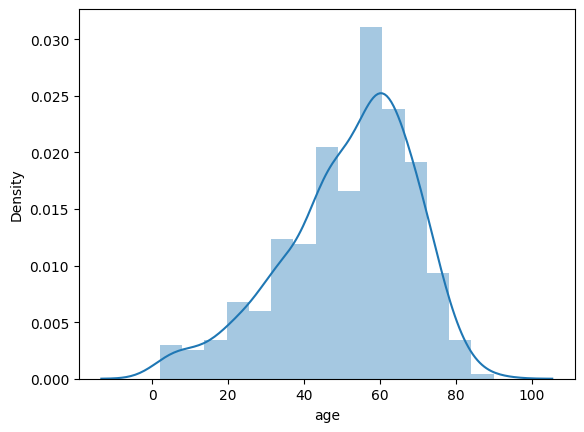

In [35]:
sns.distplot(data.age)

#Bivariate Analysis

In [85]:
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlable('age')
plt.ylable('blood_pressure')
plt.tittle('age vs blood scatter plot')

KeyError: ignored

<Figure size 500x500 with 0 Axes>

#Multivariate Analysis

AttributeError: ignored

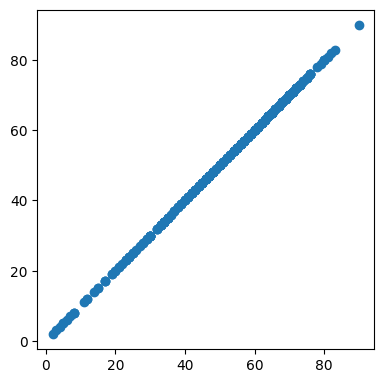

In [64]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber = 1
for coloumn in contcols :
  ax = plt.subplot(3,4,plotnumber)
  plt.scatter(data['age'],data[coloumn])
  plt.xlable(sodium,fontsize=30)
plotnumber+=1
plt.show()

#task 4

#Model Builing

In [67]:
!pip install matplotlib-venn
import classification
from classification.keras.models import classification
from classification.keras.models import classification
import tensorflow
from tensorflow.keras.models import sequencial
from tensorflow.keras.layers import Dense

classification= sequencial()
classification.add(dense(30,activation='relu'))
classification.add(dense(128,activation='relu'))
classification.add(dense(64,activation='relu'))
classification.add(dense(32,activation='relu'))
classification.add(dense(1,activation='sigmoid'))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ModuleNotFoundError: ignored

In [66]:
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

NameError: ignored

#Random Forest Model


In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy')

rfc.fit(x_train,y_train)

y_predict = rfc.predict(x_test)
y_predict_train = rfc.predict(x_train) 

NameError: ignored

#Decision Tree Model

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc = decisionTreeClassifier(max_depth=4,spliter='best',criterion='entropy')
dtc.fit(x_train,y_train)
DecisionTreeClassifier(criterion='entropy',max_depth=4)
y_predict_train = dtc.predict(x_train)

NameError: ignored

#Logistic Regreesion

In [56]:
from sklearn.lenear_model import LogisticRegression
lgr = logisticRegression ()
lgr.fit(x_train,y_train)
LgisticRegression()
#predicting our output with the model which we build
from sklearn.meterials import accuracy_source,classification_report
y_predict = lgr.predict(x_test)


ModuleNotFoundError: ignored

#Testing The Model

In [57]:
y_pred = lgr.predict([[1,1,121.000000,36.0,0,0,0,1,0]])
print(y_pred)
(y_pred)
[0]
arry([0])
y_pred = lgr.predict([[1,1,121.000000,36.0,0,0,0,1,0]])
print(y_pred)
(y_pred)
[0]
arry([0])


NameError: ignored

In [58]:
classification.save("ckd.h5")
y_pred=classification.predict(x_test)
y_pred

NameError: ignored

In [59]:
y_pred = (y_pred > 0.5)
y_pred

NameError: ignored

In [60]:
def predict_exit(sample_value):
  sample_value = np.array(sample_value)
  sample_value = sample_value.reshape(1,-1)
  sample_value = sc.transform(sample_value)
  return classifier.predict(sample_value)
  test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
  if test ==1:
    print('prediction:High chance of CKDI')
  else:
    print('prediction: Low chance of CKD')

  prediction: Low chance of CKD

SyntaxError: ignored

#TASK 5

#Performence Testing & Evaluate the Results

#Testing Model 

In [ ]:
from sklearn import model_selection

from os import name
from sklearn.exceptions import FitFailedWarning
KFold,
dfs = []
models = [
          ('LogReg',LogisticRegression()),
          ('RF',RandomForestclassifier()),
          ('DecisionTree',DecisionTreeClassifier()),
         ] 
results = []
names = []
scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted','roc_auc']
target_name = ['NO CKD','CKD']
for name,model in models:
           Kfold = model_selection.KFold(n_splits=5,shuffle=true,random_state=90210)
           CV_results = model_selection.cross_validate(model,x_train,y_train,cv=kfold,scoring=scoring)
           clf = model.Fit(x_train,y_train)
           y_pred = clf.predict(x_test)
           print(name)
           print(classification_report(y_test,y_pred,target_names=target_names))
           results.append(cv_results)
           names.append(name)
           this_df = pd.dataframe(cv_results)
           this_df['model'] = name
           dfs.append(this_df)
final = pd.concat(dfs,ignore_index=true)
return final



In [74]:
from sklearn.mertics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

plt.plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='blues',annot=true,xticklabels=['no ckd','ckd'],yticklabels=['no ckd','ckd'])
plt.xlabel('predicted values')
plt.ylabel('actual value')
plt.title('confusion matrix for logistic regression model')
plt.show()



ModuleNotFoundError: ignored

In [75]:
from sklearn.metrics import confusion_matrix
cm-confusion_matrix(y_test,y_predict)
cm

plt.figure(figsize-(8,6))
sns.heatmap(cm,cmap-'blues',annot-true,xticklabels=['no ckd','ckd'],yticklabels=['no ckd''ckd'])
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix for randomforestclassifier')
plt.show()



NameError: ignored

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues',annot=true,xtricklabels=['no ckd','ckd'],yticklabels=['no ckd','ckd'])
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix for DecisionTreeClassifier')
plt.show()

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=['no ckd','ckd'],yticklabels=['no ckd','ckd'])
plt.xlabel('predicted values')
plt.ylabel('Actual values')
plt.title('confusion matrix for ANN model')
plt.show()


NameError: ignored

#Evaluate the Result

In [79]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model] 
    bootstrap = model_df.sample(n=30,replace=true) 
    bootstraps.append(bootstrap)
bootstrap_df = pd.concat(bootstraps,igore_index=true)  
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrcs',value_name='values')
time_metrics = ['fit_time','score_time']# fit time matrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]# get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')



NameError: ignored

In [78]:
import matplotlip.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model",y="values",hue="metrics",data=result_long_nofit,palette="set3")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.title('comparison of model by classificartion metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)


ModuleNotFoundError: ignored

#TASK 6

In [81]:
pickle.dump(lgr, open('CKD.pkl','wb'))

from flask import flask,render_template,request
import numpy as np
import pickle

app = flask(_name_) # initializing a flask app
model = pickle.load(open('CKD.pkl','rb')) # loading the model

@app.route('/') # route to display the home page
def home():
    return render_template('home.html') # rendering the home page

@app.route('/prediction',methods=['POST','GET'])
def prediction():
    return render_template('indexnew.html')
@app.route('/Home',methods=['POST','GET'])
def my_home():
    return render_template('home.html')
@app.route('/predict',methods=['POST']) # route to show the predictions in a web UI
def predict():
    #reading the inouts given by the user
    input_features = [float(x) for x in request.form.values()]
    features_values = [np.array(input_features)]
    features_name = ['blood_urea','blood glucose random','anemia',
                     'coronary_artery_disease','pus_cell','red_blood_cells',
                     'diabetesmellitus','pedal_edema']
    df = pd.Dataframe(features_value,columns=features_name)
    # predictions using the loaded model file
    output = model.predict(df)

# showing the prediction results in a UI# showing the prediction results in a UI
return render_template('results.html',prediction_text=output)

if_name_=='_main_'
   # running the app
app.run(debug=true)

NameError: ignored